In [1]:
import numpy as np
import csv
import pandas as pd
from datetime import date,datetime
import sys, os, glob
import matplotlib.pyplot as plt
from scipy.spatial import distance
import math
import re

from skimage import data,filters,segmentation,measure,morphology,color
import tifffile
import cv2
import scipy.ndimage as ndimage
from scipy import ndimage
import scipy.signal as signal
from scipy.optimize import linear_sum_assignment
from scipy.ndimage import gaussian_filter
from skimage.measure import label, regionprops
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border, watershed
from skimage.measure import label, regionprops
from skimage.morphology import binary_erosion, binary_dilation, binary_opening

from PIL import Image
from PIL import ImageEnhance
import mrcfile

In [31]:
output_dir = 'I:\\Bing\\fluorescence\\3D\\03_versicle\\'    # Modified
isg_dir = 'I:\\Bing\\fluorescence\\3D\\03_versicle\\'    # Modified

file_list=[]
with open(f'../file_list_MT_ex4.txt','r') as f:     # Modified
	for line in f:
		file_list.append(line.strip('\n'))

for file_name in file_list:
    print(file_name)
    img_ISG = mrcfile.open(f'{output_dir}{file_name}_volumn_bin2_ISG.mrc', mode='r').data
    img_ISG.setflags(write=1)
    img_ISG[np.where(img_ISG < 0)] = 0

    ISG_all = []
    for z in range(len(img_ISG)):
        thresh = filters.threshold_otsu(img_ISG[z]) 
        ISG_voxel = morphology.closing(img_ISG[z] > thresh, morphology.square(3))

        # plt.imshow(np.array(ISG_voxel*img_ISG[z]), cmap='hot')
        # plt.colorbar()
        # plt.show()
        ISG_all.append(ISG_voxel*img_ISG[z])

    ISG_all = np.array(ISG_all)
    with mrcfile.new(f'{isg_dir}{file_name}_volumn_bin2_ISG_threshold.mrc', overwrite=True) as mrc:
        mrc.set_data(ISG_all)


0+10-1-1_SIM
0+10-1-2_SIM
0+10-1-2_2_SIM
0+10-1-3_SIM
0+10-1-4_SIM
0+10-2-1_SIM
0+10-2-2_SIM
0+10-2-3_SIM
0+10-2-4_SIM
0+10-2-5_SIM
5+10-1-1_SIM
5+10-1-2_SIM
5+10-1-3_SIM
5+10-1-4_SIM
5+10-1-5_SIM
5+10-1-5_2_SIM
5+10-2-1_SIM
5+10-2-2_SIM
5+10-2-4_SIM
30+10-1-1_SIM
30+10-1-3_SIM
30+10-1-4_SIM
30+10-1-5_SIM
30+10-2-1_SIM
30+10-2-3_SIM
30+10-2-3_2_SIM
30+10-2-4_SIM
30+10-2-5_SIM


In [33]:
output_dir = 'I:\\Bing\\fluorescence\\3D\\20230320MT-ISG\\03_versicle\\'    # Modified
isg_dir = 'I:\\Bing\\fluorescence\\3D\\20230320MT-ISG\\03_versicle\\'    # Modified

file_list=[]
with open(f'../file_list_MT.txt','r') as f:     # Modified
	for line in f:
		file_list.append(line.strip('\n'))

for file_name in file_list:
    print(file_name)
    img_ISG = mrcfile.open(f'{output_dir}{file_name}_volumn_bin2_ISG.mrc', mode='r').data
    img_ISG.setflags(write=1)
    img_ISG[np.where(img_ISG < 0)] = 0

    ISG_all = []
    for z in range(len(img_ISG)):
        thresh = filters.threshold_otsu(img_ISG[z]) 
        ISG_voxel = morphology.closing(img_ISG[z] > thresh, morphology.square(3))

        # plt.imshow(np.array(ISG_voxel*img_ISG[z]), cmap='hot')
        # plt.colorbar()
        # plt.show()
        ISG_all.append(ISG_voxel*img_ISG[z])

    ISG_all = np.array(ISG_all)
    with mrcfile.new(f'{isg_dir}{file_name}_volumn_bin2_ISG_threshold.mrc', overwrite=True) as mrc:
        mrc.set_data(ISG_all)

0min-1-1_SIM
0min-1-3_SIM
0min-2-1_SIM
0min-2-2_SIM
0min-2-3_SIM
0min-3-1_SIM
0min-3-2_SIM
0min-3-3_SIM
0min-3-4_SIM
30min-1-1_SIM
30min-1-2_SIM
30min-1-3_SIM
30min-3-2_SIM
30min-3-3_SIM
30min-3-4_SIM
30min-4-1_SIM
30min-4-2_SIM
30min-4-3_SIM
30min-4-4_SIM
5min-1-1_SIM
5min-1-2_SIM
5min-1-3_SIM
5min-2-1_SIM
5min-2-2_2_SIM
5min-2-2_SIM
5min-2-3_SIM
5min-2-4_SIM
5min-4-1_SIM
5min-4-2_SIM
5min-4-3_SIM


In [24]:
img_ISG.setflags(write=1)
img_ISG[np.where(img_ISG < 0)] = 0

0
0


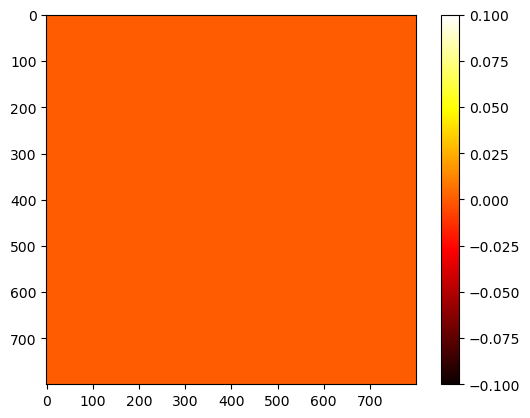

0
0


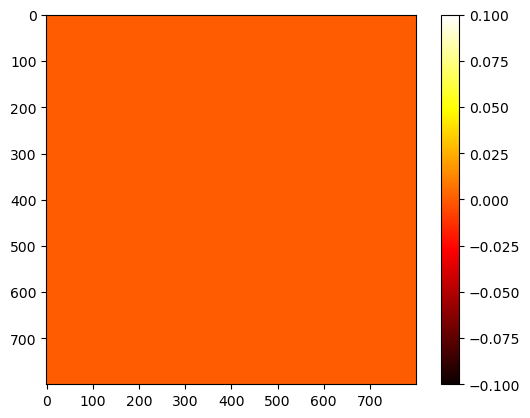

0
0


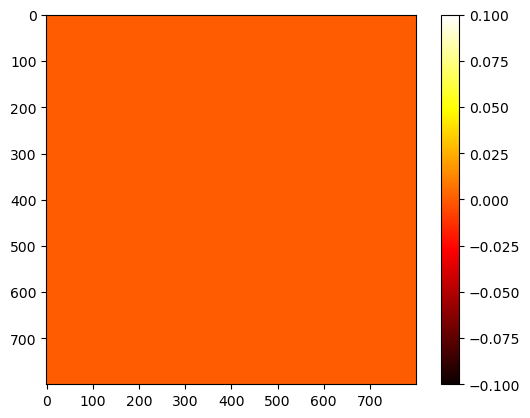

0
0


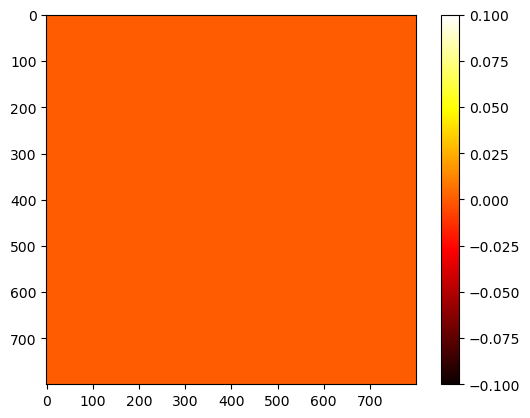

0
0


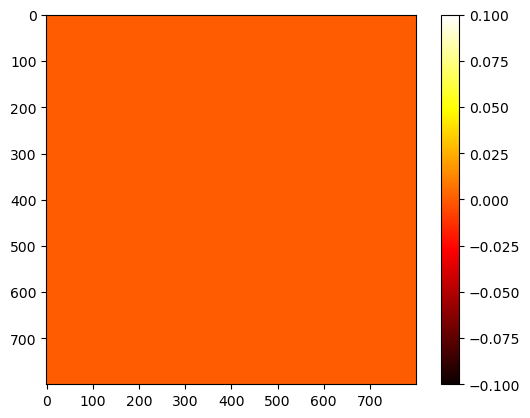

0
0


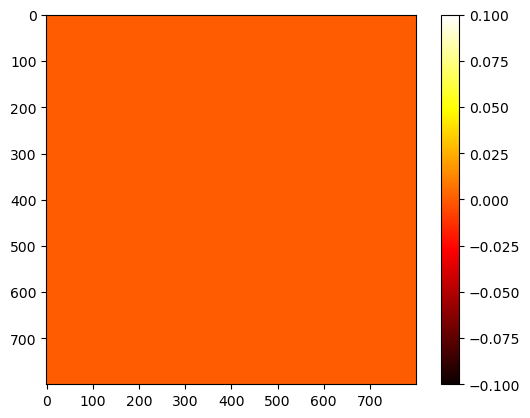

0
0


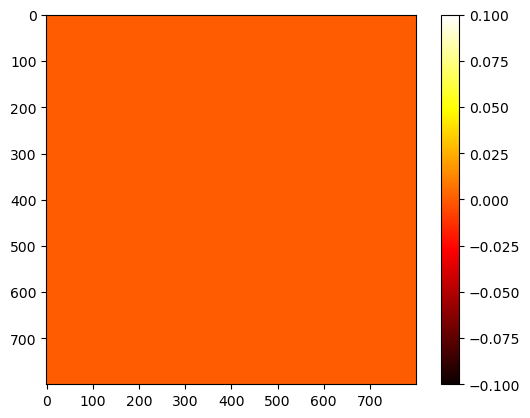

0
0


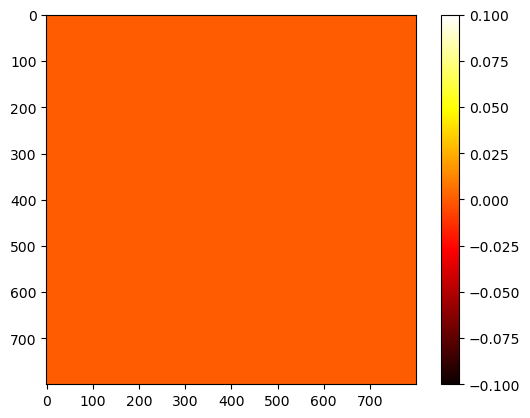

0
0


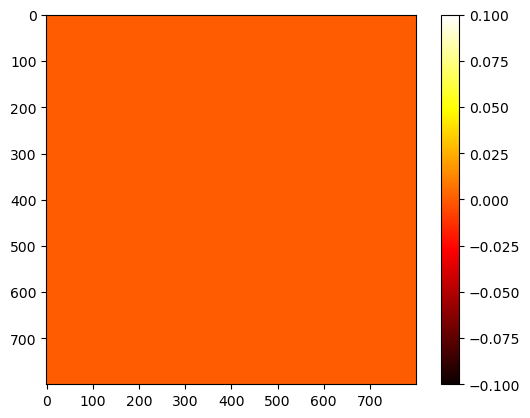

1412
0


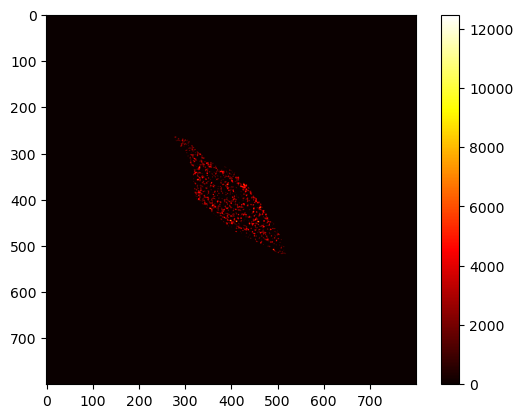

1842
0


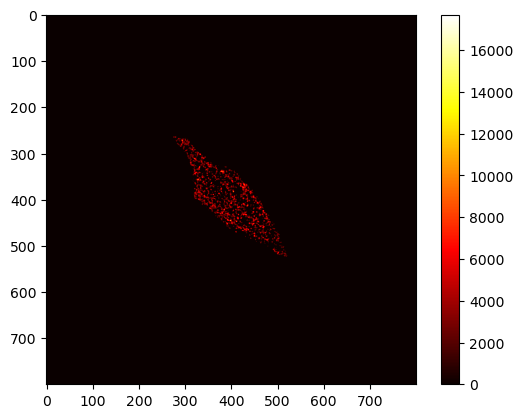

2784
0


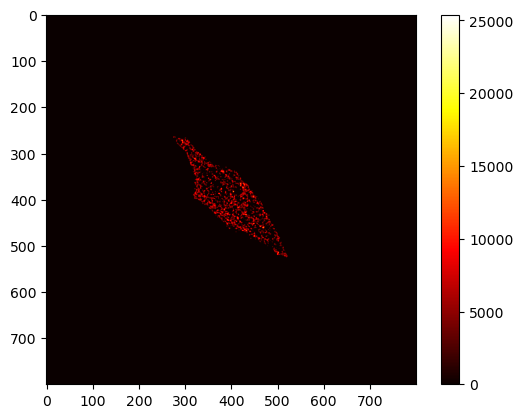

4015
0


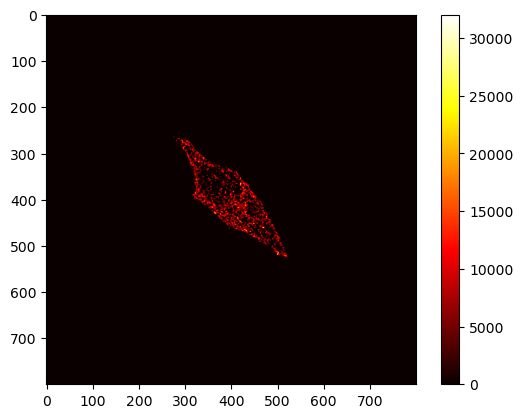

5218
0


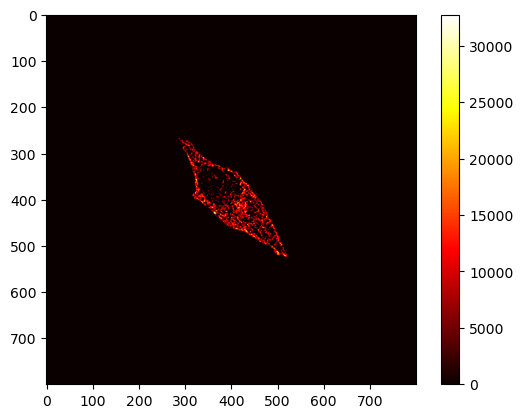

6008
0


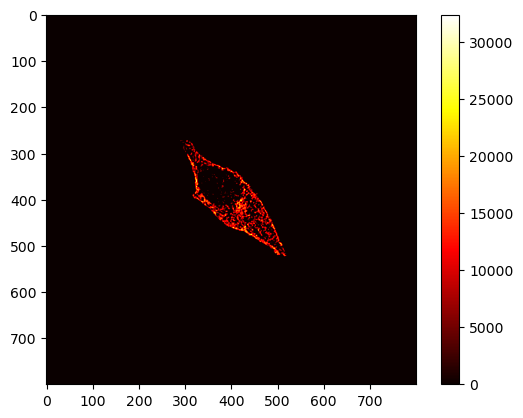

6340
0


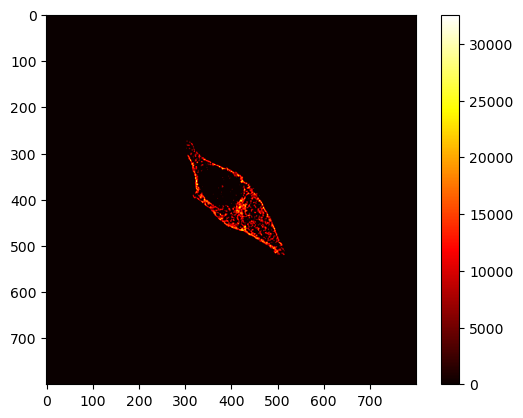

6264
0


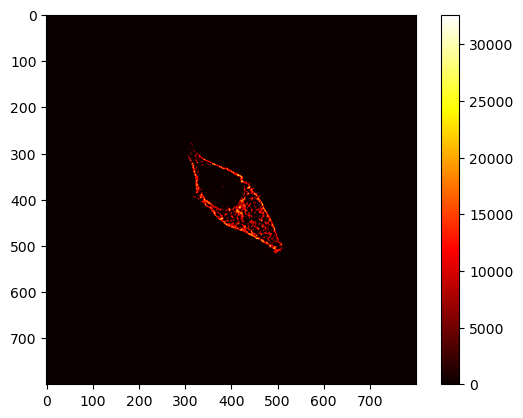

6096
0


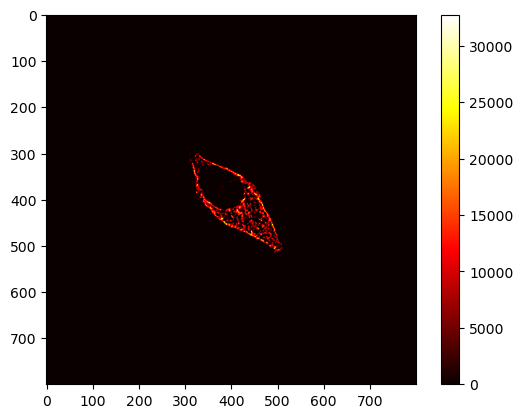

6135
0


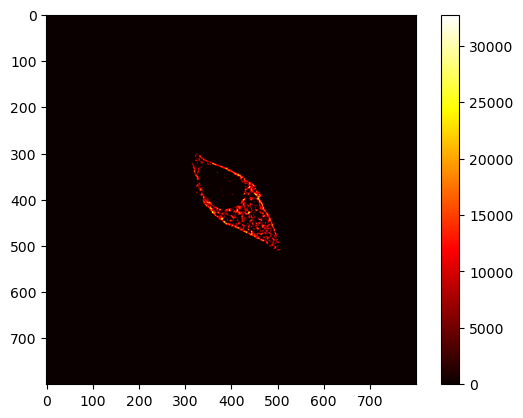

6322
0


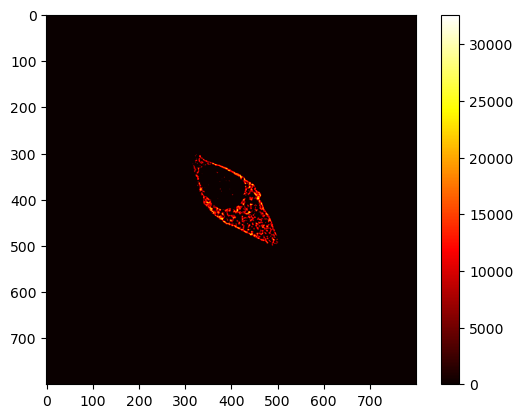

6444
0


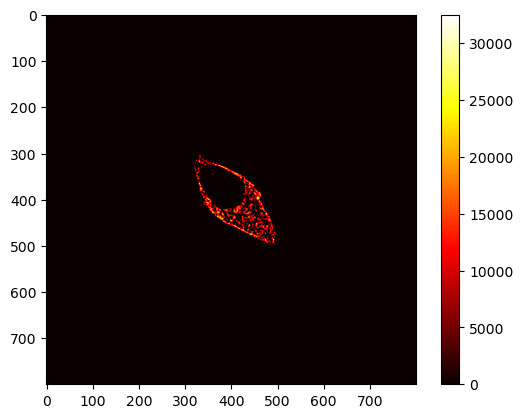

6539
0


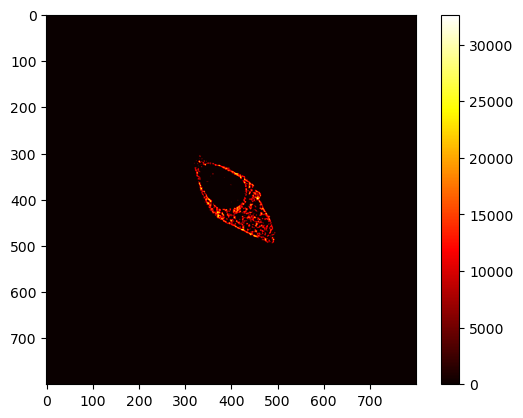

6584
0


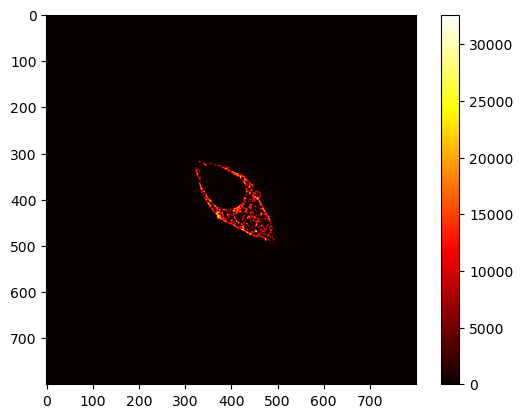

6571
0


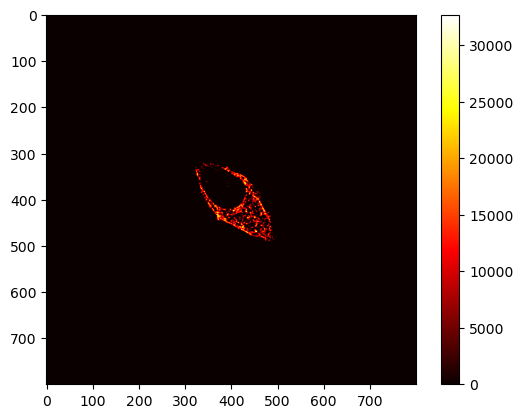

6654
0


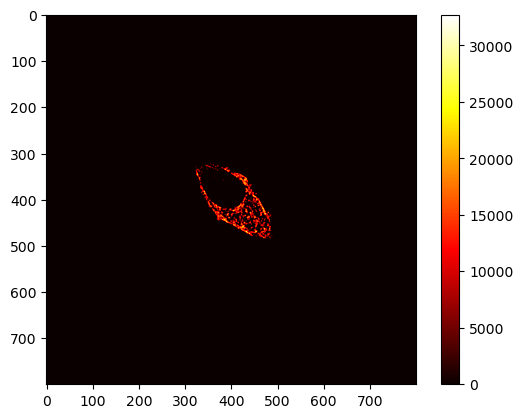

6793
0


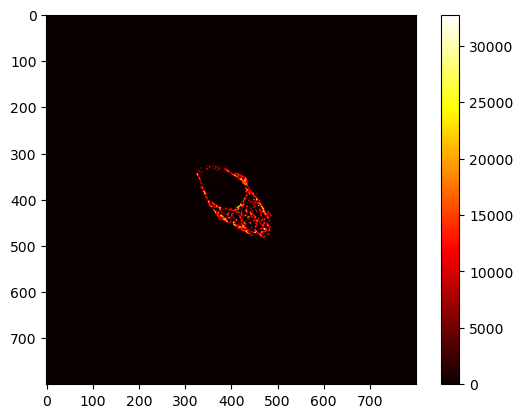

6645
0


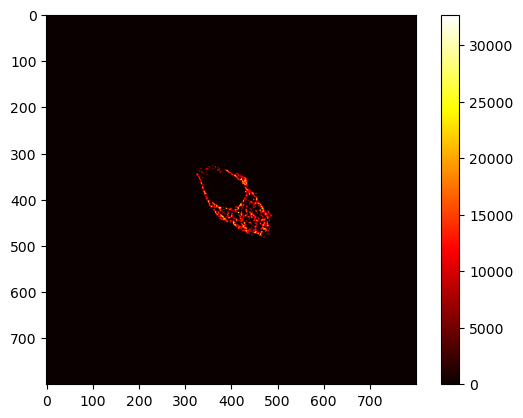

6575
0


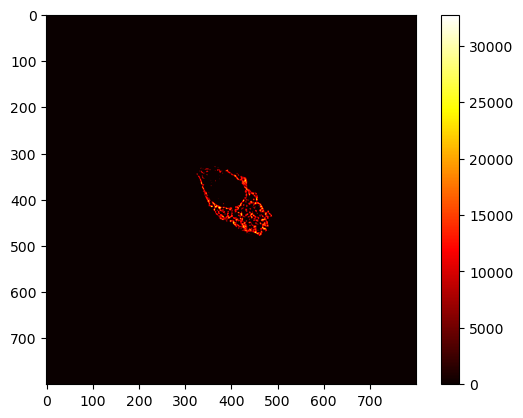

6447
0


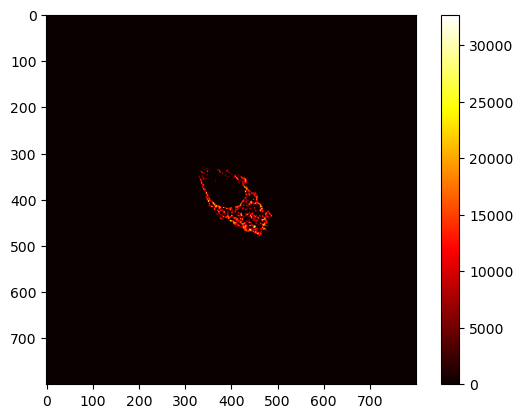

6447
0


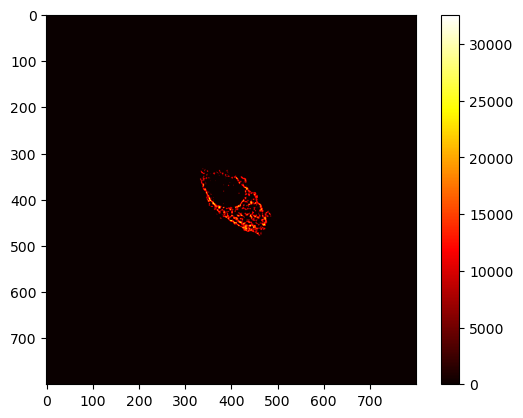

6438
0


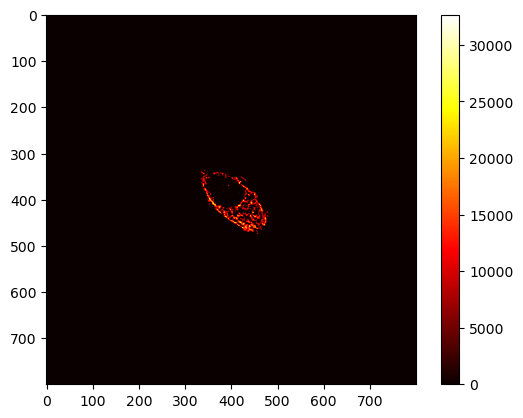

6334
0


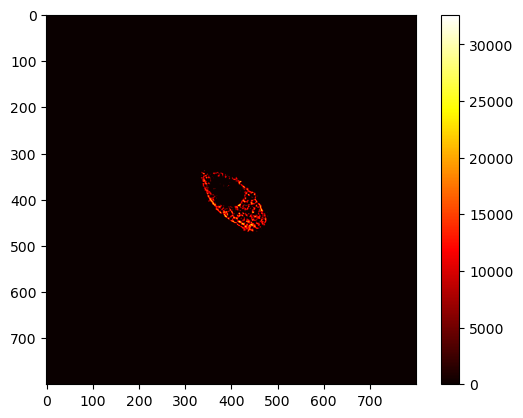

6065
0


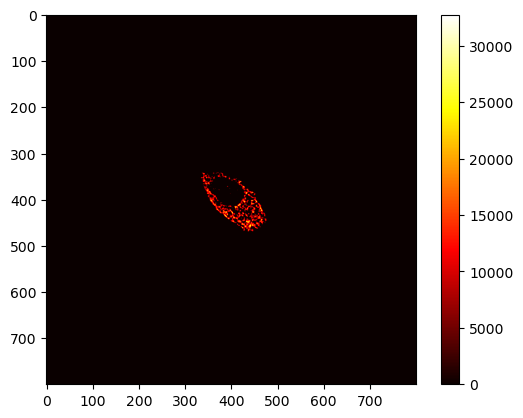

6025
0


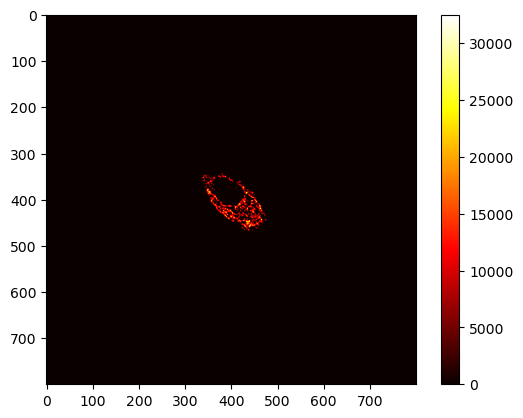

6202
0


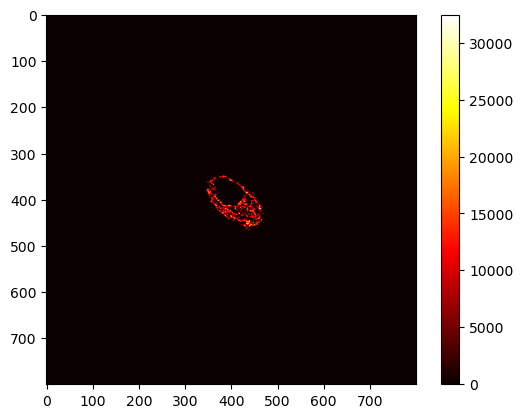

6074
0


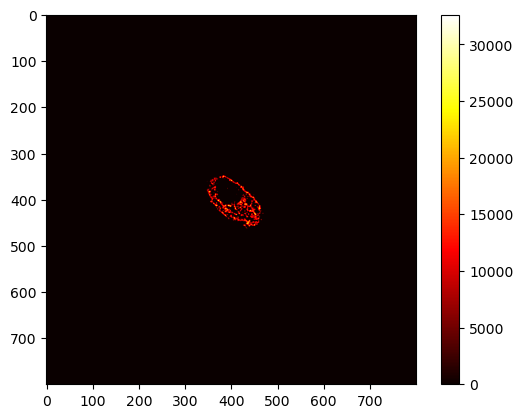

6166
0


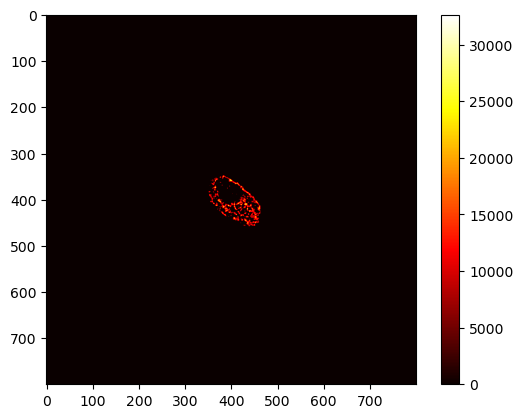

6164
0


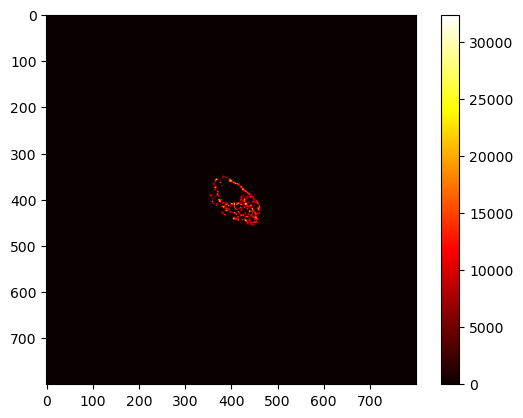

6046
0


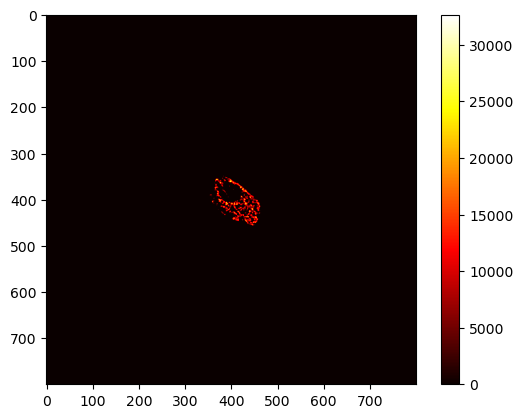

6141
0


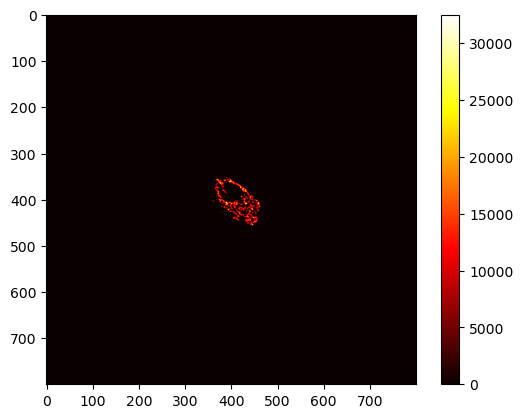

6368
0


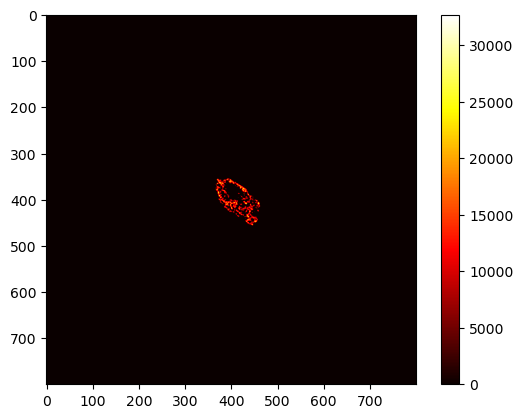

6468
0


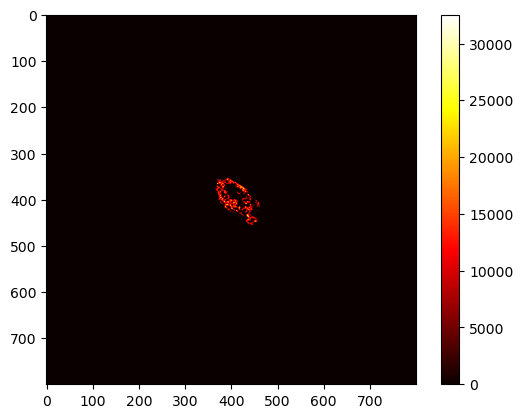

6812
0


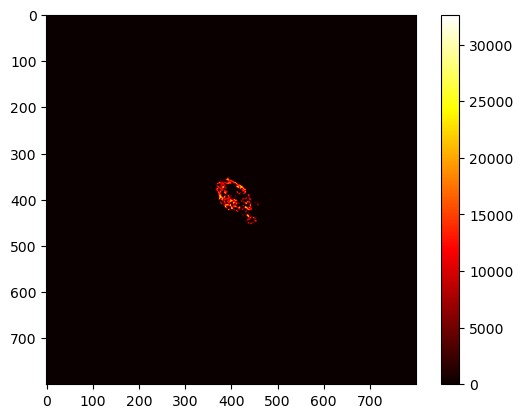

6751
0


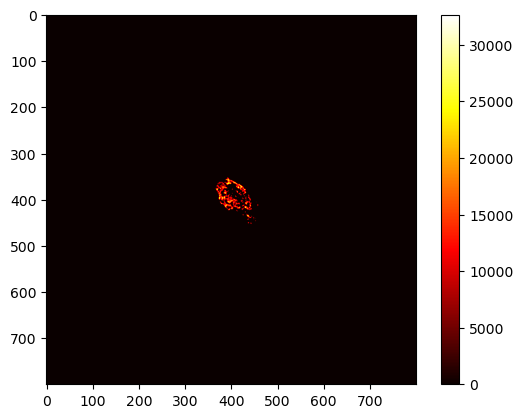

6671
0


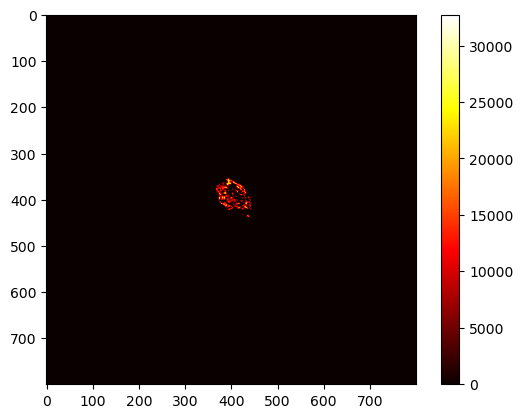

6576
0


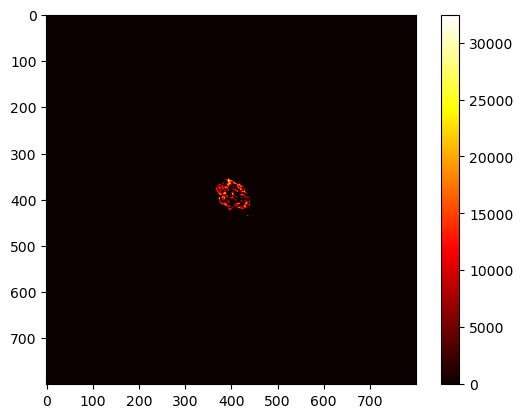

6494
0


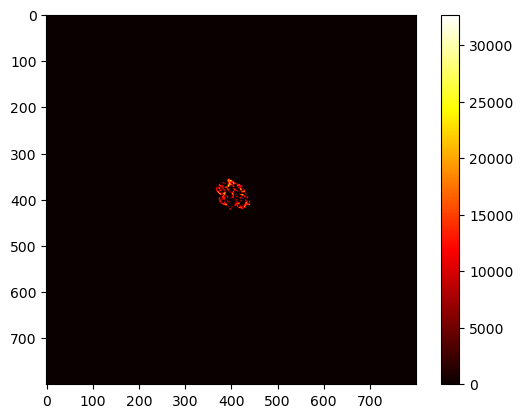

6305
0


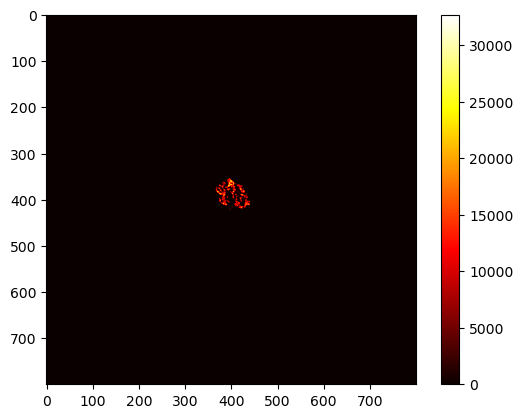

6138
0


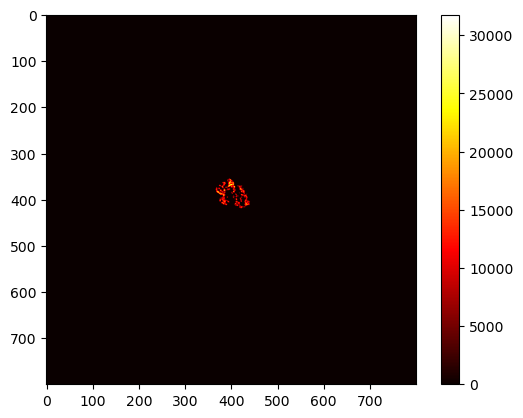

6649
0


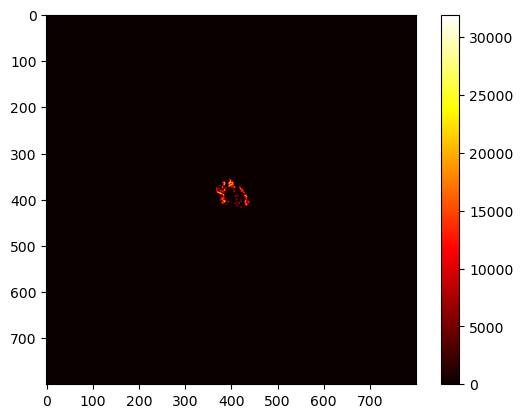

7148
0


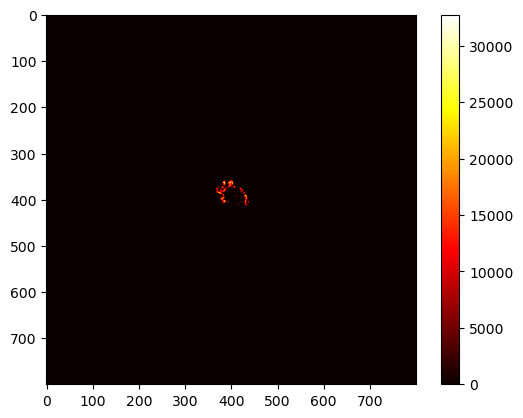

7127
0


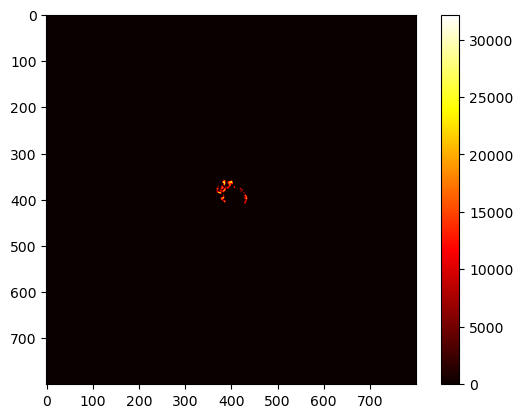

6925
0


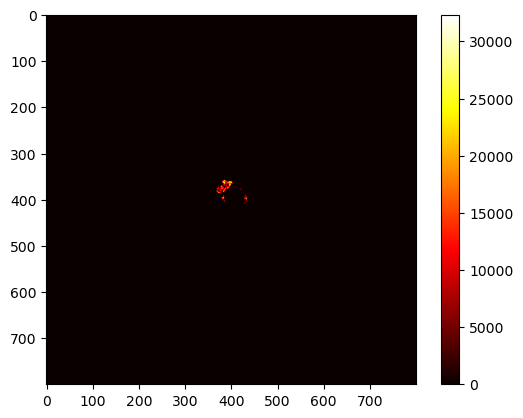

7338
0


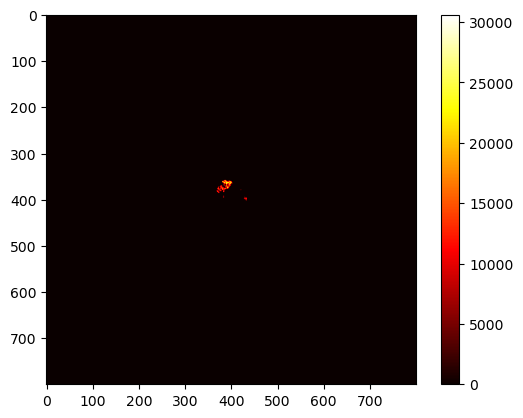

7491
0


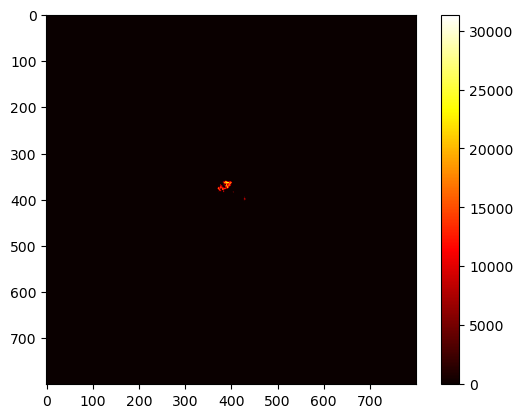

0
0


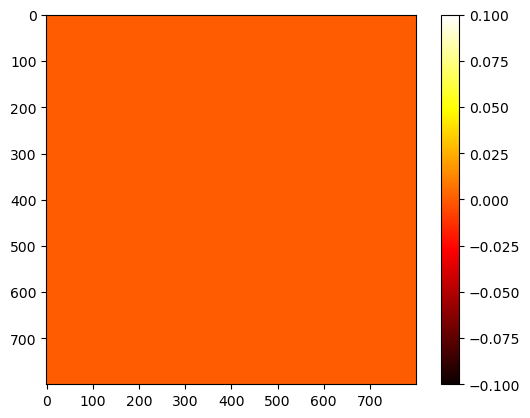

0
0


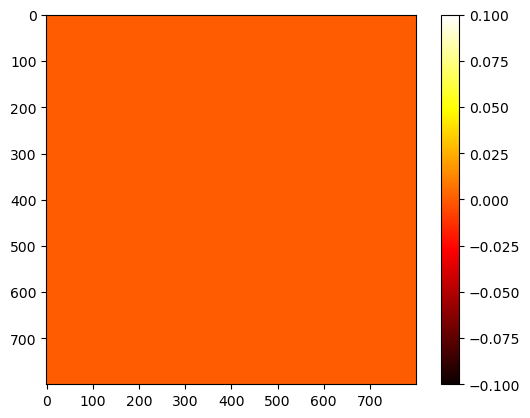

0
0


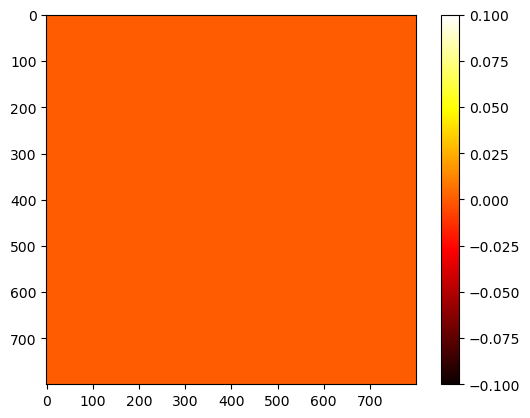

0
0


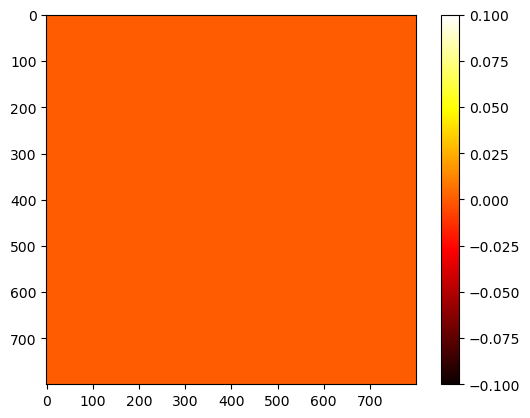

0
0


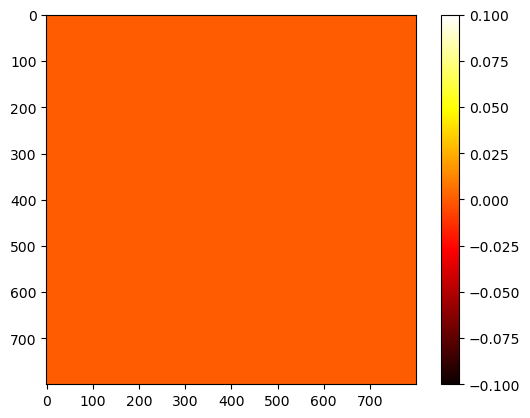

0
0


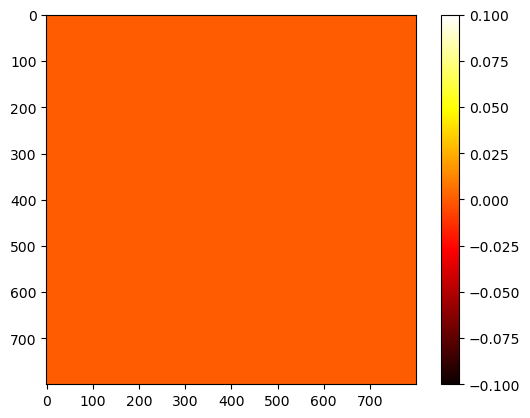

0
0


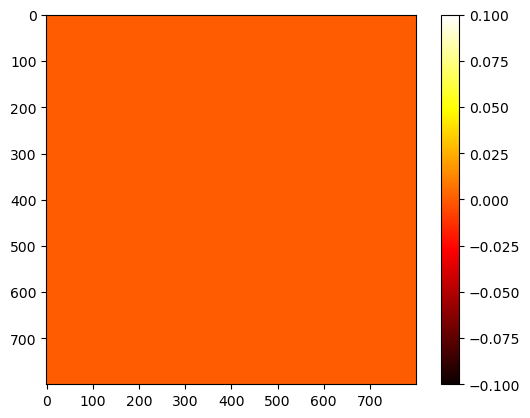

0
0


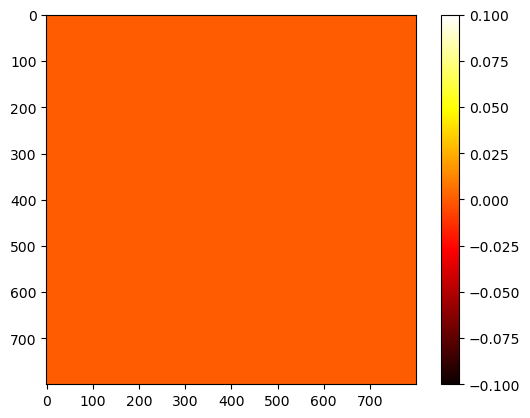

0
0


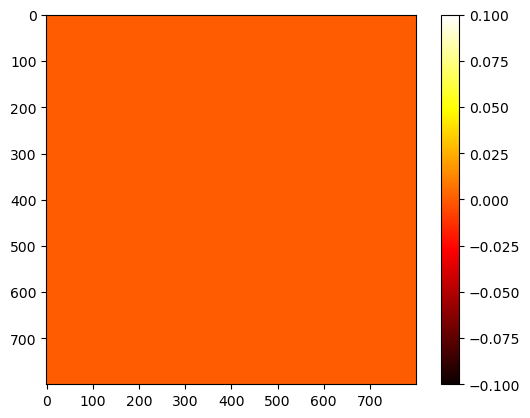

In [26]:
ISG_all = []
for z in range(len(img_ISG)):
    thresh = filters.threshold_otsu(img_ISG[z]) 
    ISG_voxel = morphology.closing(img_ISG[z] > thresh, morphology.square(3))

    # plt.imshow(np.array(ISG_voxel*img_ISG[z]), cmap='hot')
    # plt.colorbar()
    # plt.show()
    ISG_all.append(ISG_voxel*img_ISG[z])

with mrcfile.new(f'{isg_dir}{file_name}_volumn_bin2_ISG_threshold.mrc', overwrite=True) as mrc:
    mrc.set_data(ISG_all)

In [21]:
(ISG_voxel*img_ISG)[:10,:10]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 